In [30]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
from sklearn.manifold import MDS, TSNE
from matplotlib.colors import ListedColormap
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import random

## Loading and transforming the data

In [4]:
X = np.load(".\data\p2_unsupervised\X.npy")
df = pd.DataFrame(X)
df_log = np.log2(df + 1)
df_log.head()

,0,1,2,3,4,5,6,7,8,9,...,45758,45759,45760,45761,45762,45763,45764,45765,45766,45767
0,0.0,0.0,6.663803,6.888012,0.0,5.537936,0.000000,0.0,0.000000,7.339907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6.521745,6.109766,0.0,0.000000,1.620578,0.0,6.733477,3.507783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.513994,6.690080,0.0,0.000000,3.060798,0.0,6.962594,4.525632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,4.838931,7.229218,0.0,0.000000,2.216570,0.0,7.728297,5.581989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,7.341384,6.286112,0.0,5.705700,5.376655,0.0,7.209269,7.482992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will then apply PCA for dimensionality reduction. To choose the optimal number of n_components, we'll  look for the minimum number of components required to preserve the 50% of the data’s variance.

In [3]:
pca = PCA()
pca.fit_transform(df_log)

array([[ 3.73520217e+01, -7.21500771e+01, -9.22108648e+00, ...,
        -9.60712969e-02,  1.44644313e-01,  5.06505309e-13],
       [-7.78353815e+01, -6.37224132e+01,  8.14401007e+01, ...,
        -1.77925222e+00, -1.81664199e+00,  5.06505309e-13],
       [-6.66180895e+01, -6.79531614e+01,  7.73103665e+01, ...,
         2.08863117e+00, -1.68459945e-01,  5.06505309e-13],
       ...,
       [ 3.46301792e+02,  8.18224198e+01,  2.18628350e+01, ...,
        -8.58226874e-01, -2.88203118e-01,  5.06505309e-13],
       [ 3.31708470e+02,  7.83287357e+01,  1.63302857e+01, ...,
        -4.88369711e-01,  4.43903195e-01,  5.06505309e-13],
       [ 2.91154565e+02,  7.79478483e+01,  4.73297287e+01, ...,
         2.27151408e-01, -3.32175704e-01,  5.06505309e-13]])

In [4]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
np.where(np.cumsum(pca.explained_variance_ratio_)>=0.50)[0][0]


307

Text(0, 0.5, 'Cumulative Variance (%)')

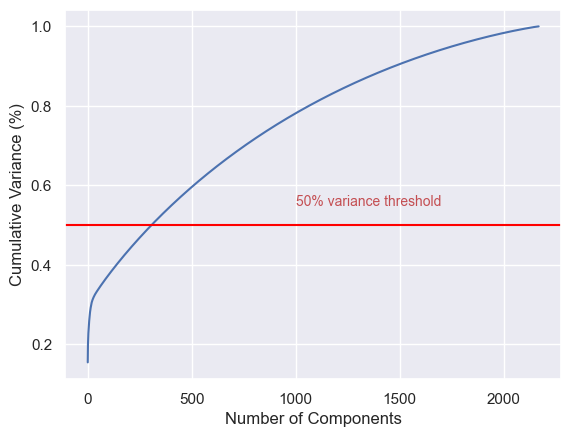

In [92]:
plt.plot(np.arange(2169), cumsum)
plt.axhline(y = 0.5, color = 'red', linestyle = '-') 
plt.text(1000, 0.55, '50% variance threshold', color = 'r', fontsize=10)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')

In [67]:
pca = PCA(n_components=307)
x_pca = pca.fit_transform(df_log)
df_pca = pd.DataFrame(x_pca)

## Problem 2 (Part 1: Visualization)

1. (3 points) Provide at least one visualization which clearly shows the existence of three main brain cell types as described by the scientist, and explain how it shows this. Your visualization should support the idea that cells from different groups can differ greatly.

PCA visualization

<Axes: xlabel='0', ylabel='1'>

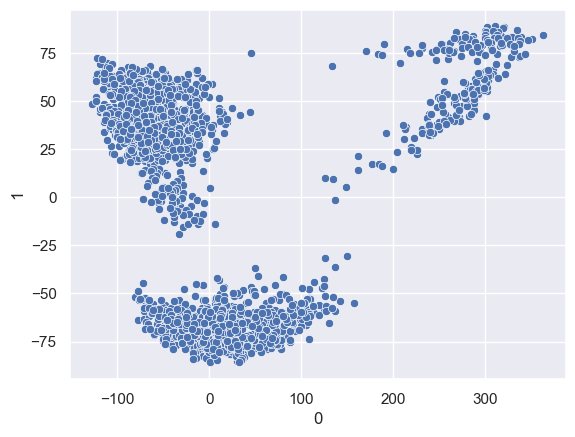

In [68]:
sns.scatterplot(data=df_pca, x=df_pca[0], y=df_pca[1])

t-SNE Visualization

<Axes: xlabel='0', ylabel='1'>

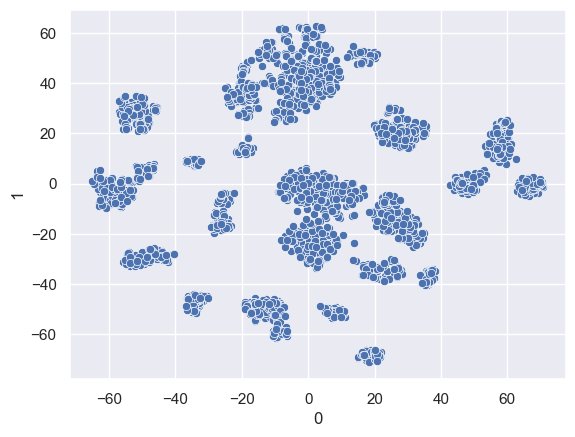

In [8]:
x_tsne = TSNE(n_components=2, perplexity=10.0).fit_transform(x_pca)
df_tsne = pd.DataFrame(x_tsne)
sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1])

MDS Visualization

In [14]:
mds = MDS(n_components=2)
x_mds = mds.fit_transform(x_pca)
df_mds = pd.DataFrame(x_mds)

c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

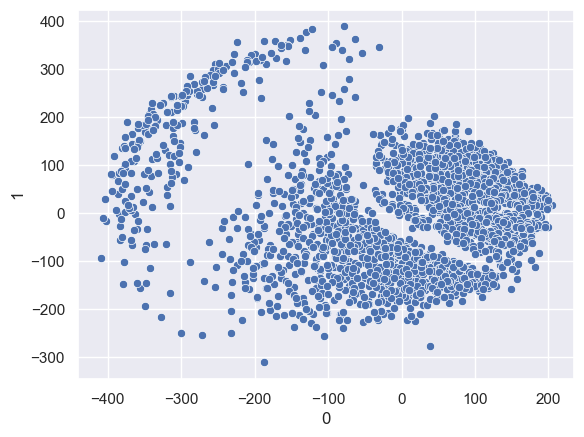

In [17]:
sns.scatterplot(data=df_mds, x=df_mds[0], y=df_mds[1])

Visualizing clusters with MDS and KMeans

In [20]:
kmeans = KMeans(n_clusters=3)
mds_kmeans = kmeans.fit(df_mds)

c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


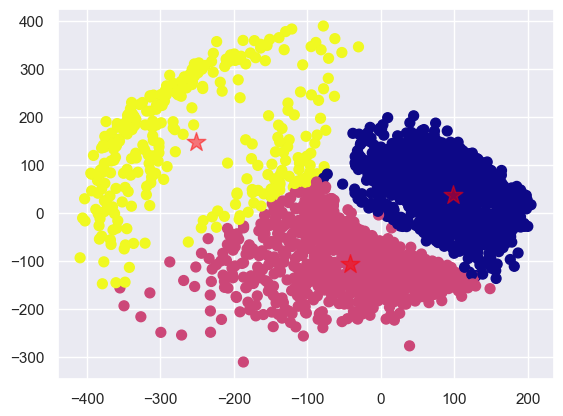

In [21]:
plt.scatter(df_mds[0], df_mds[1], c=mds_kmeans.labels_.astype(float), 
            s=50, cmap='plasma')
centers = mds_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker ='*', c='red', s=200, alpha=0.5)

## Part 2: Unsupervised Feature Selection


1. (4 points) Using your clustering method(s) of choice, find a suitable clustering for the cells. Briefly explain how you chose the number of clusters by appropriate visualizations and/or numerical findings. (to cluster cells into the subcategories instead of categories)

Elbow Method

In [56]:
# function that iterates WCSS over the number of clusters k and plots WCSS as a function of k
def cluster_Wcss(data, n, k):
       
    wcss = []
    sscore = []
    
    for i in range(n, k):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(data)
        silhouette_score()
        wcss.append(kmeans.inertia_)
        sscore.apend(silhouette_score)
    
    plt.figure(figsize=(10,5))
    plt.plot(range(n,k), wcss, sscore)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

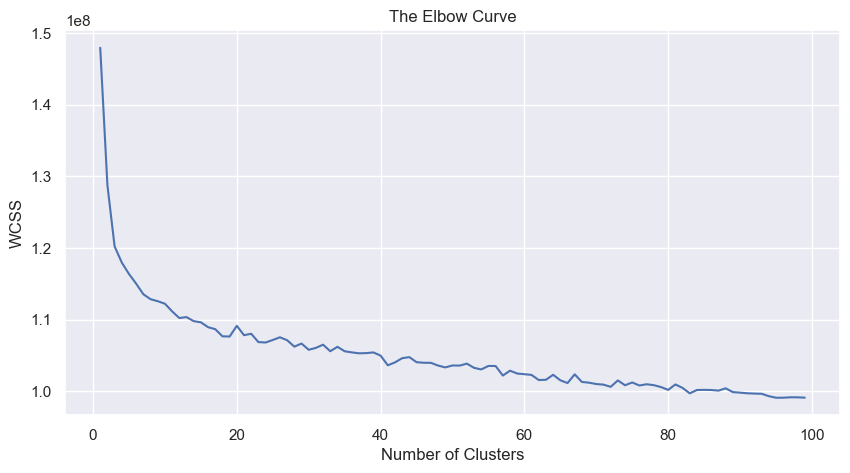

In [65]:
cluster_Wcss(x_pca, 1, 100)

Analizing the Silhouette Score Curve

In [10]:
silhouette_avg = []

for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_pca)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    label = kmeans.labels_
    silhouette_avg.append(silhouette_score(x_pca, label))
    

c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

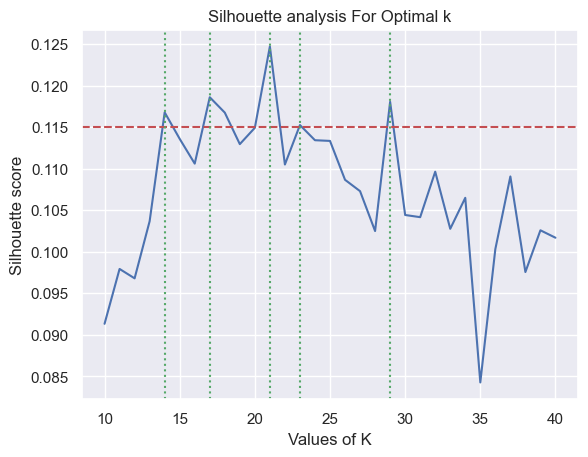

In [34]:
plt.plot(range_n_clusters, silhouette_avg)
plt.axhline(y = 0.115, color = 'r', linestyle = '--') 
plt.axvline(x= 14, color = 'g', linestyle = 'dotted') 
plt.axvline(x= 17, color = 'g', linestyle = 'dotted') 
plt.axvline(x= 21, color = 'g', linestyle = 'dotted') 
plt.axvline(x= 23, color = 'g', linestyle = 'dotted') 
plt.axvline(x= 29, color = 'g', linestyle = 'dotted') 
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Running KMeans for the chosen values of K and visualizing it with T-SNE

In [9]:
kmeans = KMeans(n_clusters=21)
tsne_kmeans = kmeans.fit(df_tsne)

c:\Users\menezebe\MITx\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


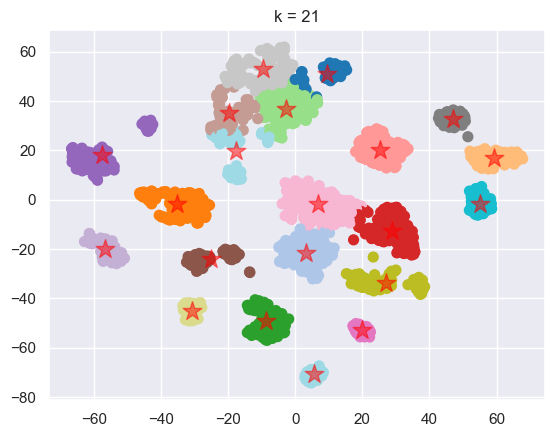

In [78]:
plt.scatter(df_tsne[0], df_tsne[1], c=tsne_kmeans.labels_.astype(float), 
            s=50, cmap='tab20')
plt.title('k = 21')
centers = tsne_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200, alpha=0.5)

2. (6 points) We will now treat your cluster assignments as labels for supervised learning. Fit a logistic regression model to the original data (not principal components), with your clustering as the target labels. Since the data is high-dimensional, make sure to regularize your model using your choice of L1, L2, or elastic net, and separate the data into training and validation or use cross-validation to select your model. Report your choice of regularization parameter and validation performance.

Logistic Regression

In [16]:
X = df_log
y = tsne_kmeans.labels_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
logreg = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    multi_class='ovr'
).fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9631336405529954

3. (9 points) Select the features with the top 100 corresponding coefficient values (since this is a multi-class model, you can rank the coefficients using the maximum absolute value over classes, or the sum of absolute values). Take the evaluation training data in p2_evaluation and use a subset of the genes consisting of the features you selected. Train a logistic regression classifier on this training data, and evaluate its performance on the evaluation test data. Report your score. (Don't forget to take the log transform before training and testing.)
Compare the obtained score with two baselines: random features (take a random selection of 100 genes), and high-variance features (take the 100 genes with highest variance). Finally, compare the variances of the features you selected with the highest variance features by plotting a histogram of the variances of features selected by both methods.


In [28]:
p2_evaluation_x_train = np.log2(pd.DataFrame(np.load('.\data\p2_evaluation\X_train.npy'))+1)
p2_evaluation_x_test = np.log2(pd.DataFrame(np.load('.\data\p2_evaluation\X_test.npy'))+1)
p2_evaluation_y_train = pd.DataFrame(np.load('.\data\p2_evaluation\y_train.npy'))
p2_evaluation_y_test = pd.DataFrame(np.load('.\data\p2_evaluation\y_test.npy'))

In [18]:
coef = logreg.coef_
coef_i = []

for y in range(coef.shape[1]):
    coef_i.append([coef[x][y] for x in range(coef.shape[0])])

sum_coef = pd.DataFrame([sum(abs(i)) for i in np.array(coef_i)])
top_features = sum_coef.sort_values(by=0, ascending=False, ignore_index=False).head(100).index

In [19]:
df_log[top_features].head()

,36985,31421,4084,4356,41846,34516,42363,37125,4688,31662,...,23659,23678,25827,4011,4498,36986,38552,24592,25448,37255
0,0.000000,9.053583,0.000000,0.000000,8.014635,9.172014,0.0,0.000000,12.468008,0.000000,...,0.0,0.000000,0.0,5.053166,8.051154,7.389644,7.216717,0.000000,0.000000,3.100434
1,2.111021,0.000000,4.549041,10.164448,7.929394,11.147284,0.0,0.000000,10.237185,4.762602,...,0.0,0.500798,0.0,7.627229,6.898135,7.252416,5.366485,2.676934,0.000000,3.454164
2,2.134121,6.861083,0.000000,0.000000,8.421200,10.243473,0.0,0.000000,9.272606,5.475769,...,0.0,0.000000,0.0,5.802196,7.354958,8.064237,3.806720,0.000000,0.000000,4.119649
3,0.000000,7.559222,6.442703,0.000000,7.535104,10.003620,0.0,0.605138,11.776287,3.052371,...,0.0,0.000000,0.0,0.000000,6.710169,8.909760,5.953534,0.000000,0.605138,3.140266
4,0.000000,10.561145,0.000000,0.000000,8.470733,8.489165,0.0,0.000000,11.113646,6.462298,...,0.0,0.000000,0.0,5.085086,0.000000,7.148722,5.168777,0.000000,0.000000,0.000000


Running the logistic regression for the top 100 features

In [29]:
logreg_top100 = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    multi_class='ovr'
).fit(p2_evaluation_x_train[top_features], p2_evaluation_y_train.values.ravel())

logreg_top100.score(p2_evaluation_x_test[top_features], p2_evaluation_y_test.values.ravel())

0.9395306859205776

Running the logistic regression for 100 random features

In [32]:
random_features = random.sample(range(0, p2_evaluation_x_train.shape[1]-1), 100)

logreg_random100 = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    multi_class='ovr'
).fit(p2_evaluation_x_train[random_features], p2_evaluation_y_train.values.ravel())

logreg_random100.score(p2_evaluation_x_test[random_features], p2_evaluation_y_test.values.ravel())

0.4395306859205776

Running logistic regression for 100 top variances

In [33]:
top_variances = pd.DataFrame(df_log.var(axis=0, skipna=True)).sort_values(by=0, ascending=False, ignore_index=False).head(100).index

In [34]:
log_regvar100 = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    multi_class='ovr'
).fit(p2_evaluation_x_train[top_variances], p2_evaluation_y_train.values.ravel())

log_regvar100.score(p2_evaluation_x_test[top_variances], p2_evaluation_y_test.values.ravel())

0.9268953068592057

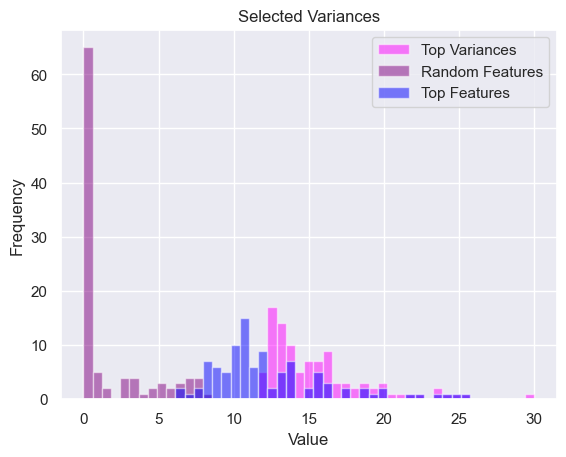

In [41]:
data = {
    'Top Variances': pd.DataFrame(df_log[top_variances].var(axis=0, skipna=True)),
    'Top Features': pd.DataFrame(df_log[top_features].var(axis=0, skipna=True)),
    'Random Features': pd.DataFrame(df_log[random_features].var(axis=0, skipna=True))
}

bins = np.linspace(0, 30, 50)

plt.hist(data['Top Variances'], bins=bins, color= 'magenta', alpha=0.5, label='Top Variances', align='mid')
plt.hist(data['Random Features'], bins=bins, color='purple', alpha=0.5, label='Random Features', align='mid')
plt.hist(data['Top Features'], bins=bins, color='blue', alpha=0.5, label='Top Features', align='mid')

plt.legend(loc='upper right')
plt.title('Selected Variances')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Problem 3

1. (3 points) When we created the T-SNE plot in Problem 1, we ran T-SNE on the top 50 PC's of the data. But we could have easily chosen a different number of PC's to represent the data. Run T-SNE using 10, 50, 100, 250, and 500 PC's, and plot the resulting visualization for each. What do you observe as you increase the number of PC's used?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


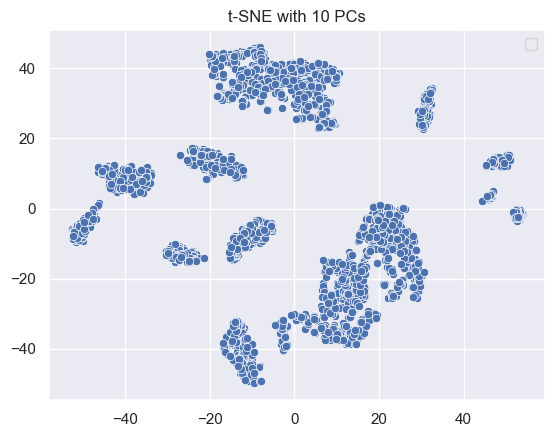

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


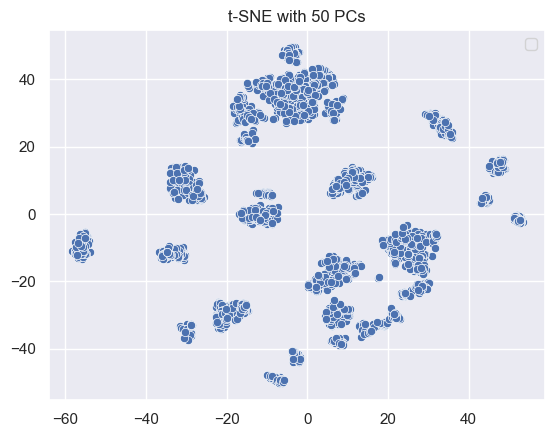

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


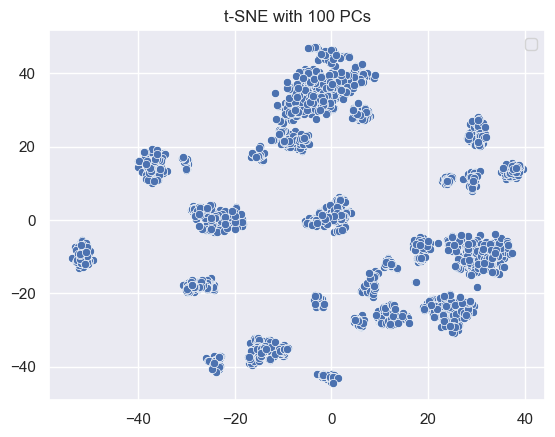

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


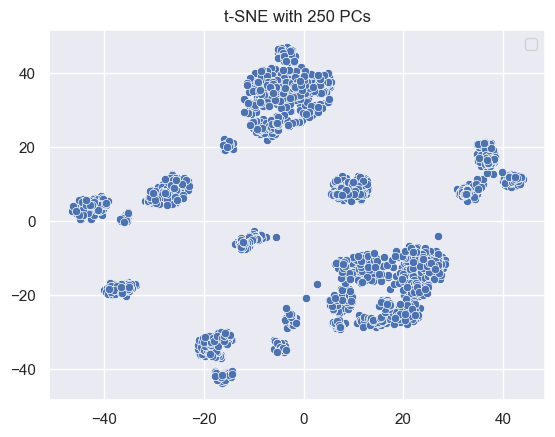

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


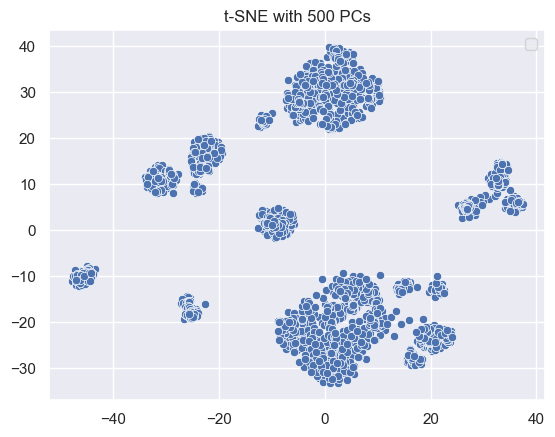

In [71]:
for pc in [10, 50, 100, 250, 500]:
    x_tsne = TSNE(perplexity=40).fit_transform(PCA(pc).fit_transform(df_log))
    sns.scatterplot(x= x_tsne[:, 0], y=x_tsne[:, 1])
    plt.legend()
    plt.title('t-SNE with {} PCs'.format(pc))
    plt.show()


2. (13 points) Pick three hyper-parameters below (the 3 is the total number that a report needs to analyze. It can take a) 2 from A, 1 from B, or b) 1 from A, 2 from B.) and analyze how changing the hyper-parameters affect the conclusions that can be drawn from the data. Please choose at least one hyper-parameter from each of the two categories (visualization and clustering/feature selection). At minimum, evaluate the hyper-parameters individually, but you may also evaluate how joint changes in the hyper-parameters affect the results. You may use any of the datasets we have given you in this project. For visualization hyper-parameters, you may find it productive to augment your analysis with experiments on synthetic data, though we request that you use real data in at least one demonstration.
Some possible choices of hyper-parameters are:
Category A (visualization):
●	T-SNE perplexity
●	T-SNE learning rate
●	T-SNE early exaggeration
●	T-SNE initialization
●	T-SNE number of iterations/convergence tolerance
Category B (clustering/feature selection):
●	Effect of number of PC's chosen on clustering
●	Type of clustering criterion used in hierarchical clustering (single linkage vs ward, for example)
●	Number of clusters chosen for use in unsupervised feature selection and how it affects the quality of the chosen features
●	Magnitude of regularization and its relation to your feature selection (for example, does under or over-regularizing the model lead to bad features being selected?)
●	Type of regularization (L1, L2, elastic net) in the logistic regression step and how the resulting features selected differ
For visualization hyper-parameters, provide substantial visualizations and explanation on how the parameter affects the image.
For clustering/feature selection, provide visualizations and/or numerical results which demonstrate how different choices affect the downstream visualizations and feature selection quality.
Provide adequate explanations in words for each of these visualizations and numerical results.


Running t-SNE for different values of perplexity.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


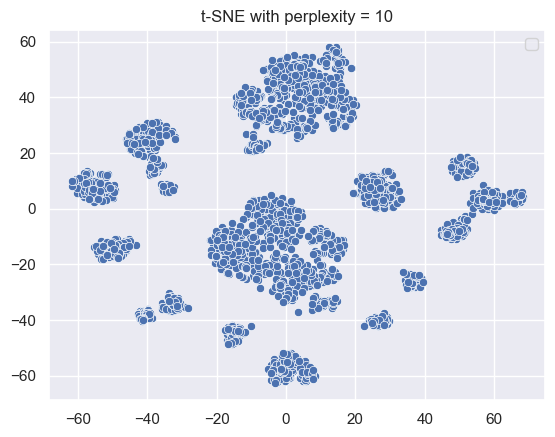

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


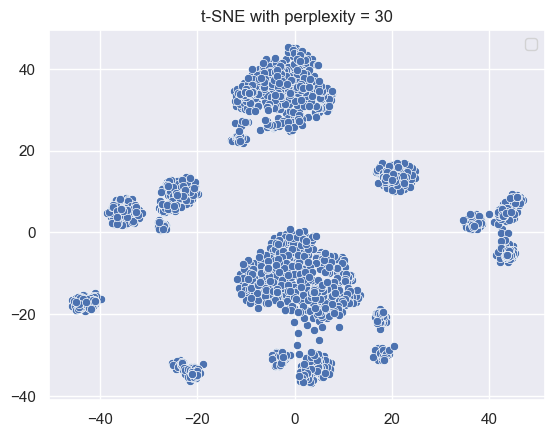

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


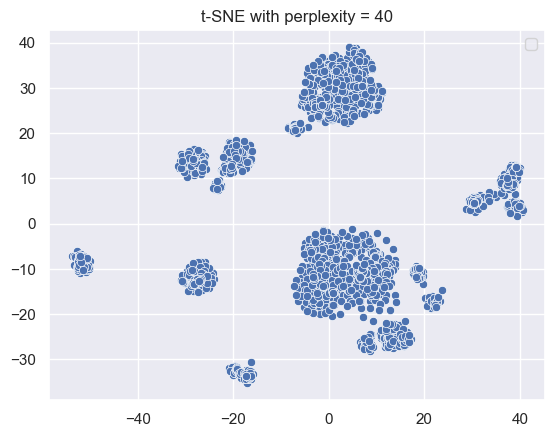

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


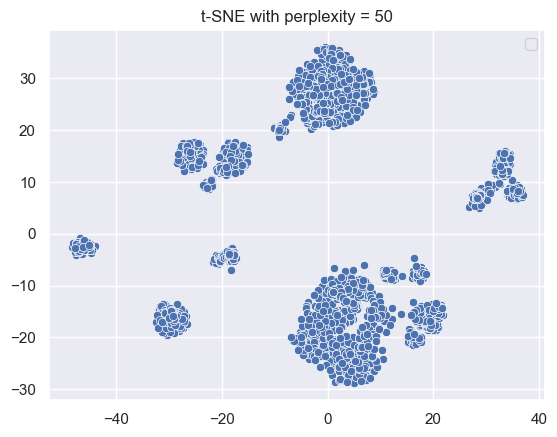

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


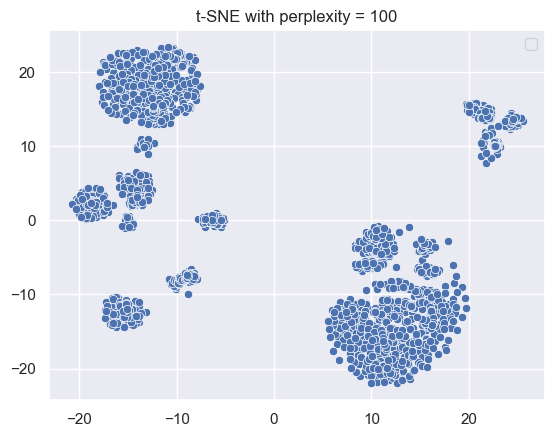

In [72]:
for p in [10, 30, 40, 50, 100]:
    x_tsne = TSNE(perplexity=p).fit_transform(x_pca)
    sns.scatterplot(x= x_tsne[:, 0], y=x_tsne[:, 1])
    plt.legend()
    plt.title('t-SNE with perplexity = {}'.format(p))
    plt.show()

Running t-SNE for different initialization parameters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


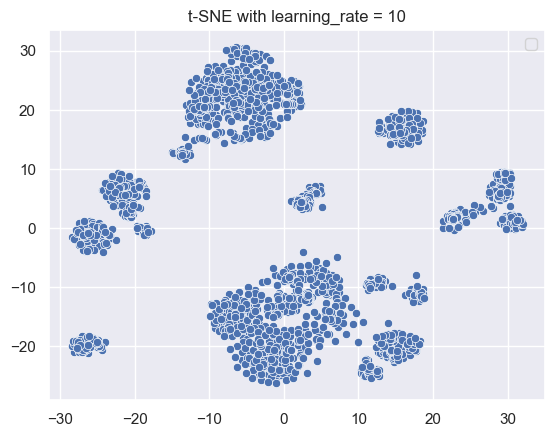

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


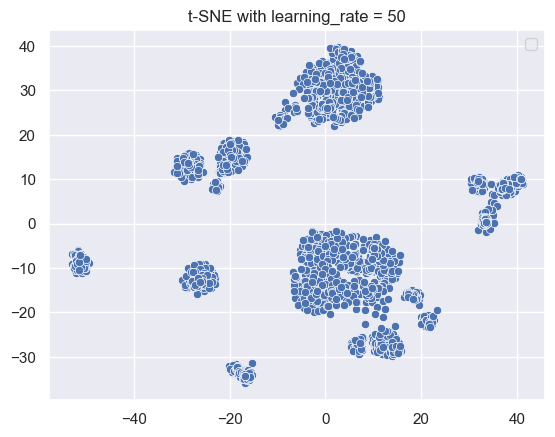

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


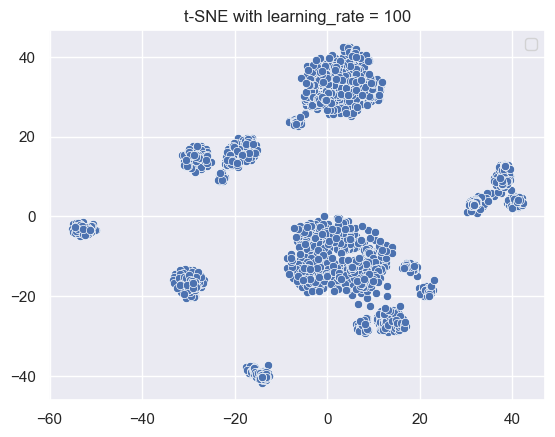

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


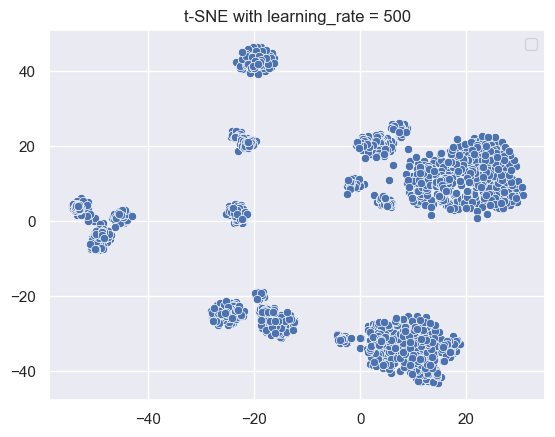

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


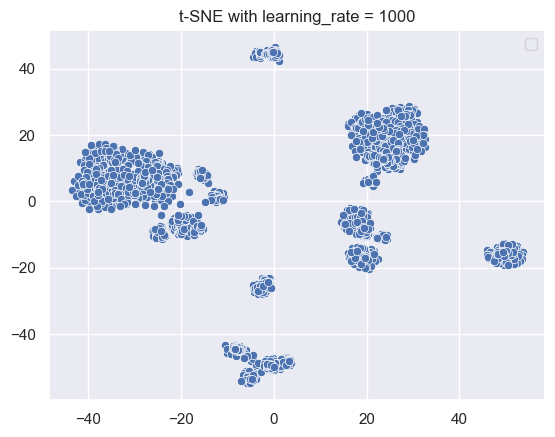

In [75]:
for rate in [10, 50, 100, 500, 1000]:
    x_tsne = TSNE(perplexity=40.0, learning_rate=rate).fit_transform(x_pca)
    sns.scatterplot(x= x_tsne[:, 0], y=x_tsne[:, 1])
    plt.legend()
    plt.title('t-SNE with learning_rate = {}'.format(rate))
    plt.show()